In [0]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima

In [0]:
# Load the Air Passengers dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [0]:

# Explore the dataset
print(df.head())
print(df.describe())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


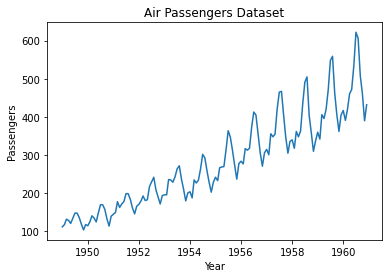

In [0]:
# Visualize the dataset
plt.plot(df)
plt.title('Air Passengers Dataset')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [0]:
# Check for stationarity
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(key, value)

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
Critical Values:
1% -3.4816817173418295
Critical Values:
5% -2.8840418343195267
Critical Values:
10% -2.578770059171598


In [0]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

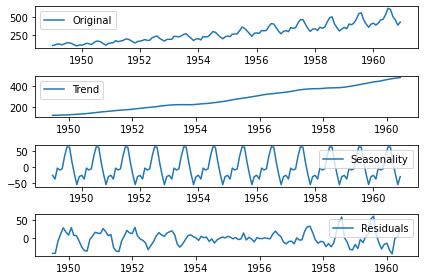

In [0]:
# Visualize the decomposition
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/databricks/python/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


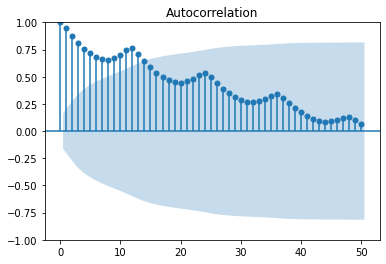

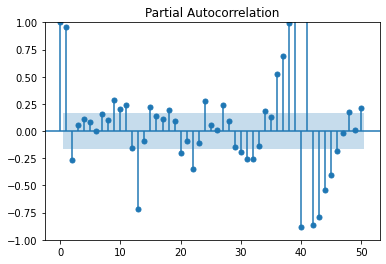

In [0]:
# Plot ACF and PACF
plot_acf(df, lags=50)
plot_pacf(df, lags=50)
plt.show()

In [0]:
# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [0]:
# Find the optimal ARIMA parameters
model = auto_arima(train, seasonal=True, m=12)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -375.750
Date:                            Wed, 29 Mar 2023   AIC                            755.499
Time:                                    00:26:00   BIC                            760.749
Sample:                                01-01-1949   HQIC                           757.625
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.090     -2.271      0.023      -0.382      -0.028
sigma2        92.6974     13.326   

In [0]:

# Fit the ARIMA model on the train set
model.fit(train)

Out[13]: ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [0]:

# Predict on the test set
predictions = model.predict(n_periods=len(test))

In [0]:
# Evaluate the model using mean squared error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 35.08281305366807


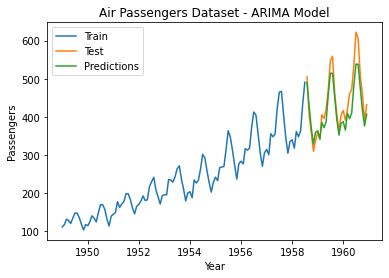

In [0]:
# Visualize the predictions
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.title('Air Passengers Dataset - ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()